# make S_Curve

In [1]:
from sklearn.datasets import make_s_curve
import matplotlib.pyplot as plt
x, y = make_s_curve(n_samples = 500)
from mpl_toolkits.mplot3d import Axes3D
ax = plt.axes(projection = '3d')
ax.scatter3D(x[:, 0], x[:, 1], x[:, 2], c = y)
ax.view_init(-10, 60)

# PCA on S_Curve

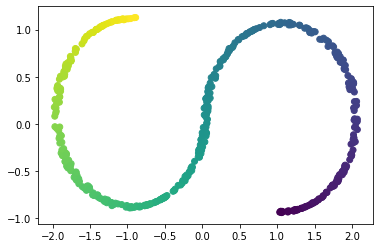

In [2]:
from sklearn.decomposition import PCA
x_pca = PCA(n_components = 2).fit_transform(x)
plt.scatter(x_pca[:, 0], x_pca[:, 1], c = y)

# ISOMAP on S_Curve

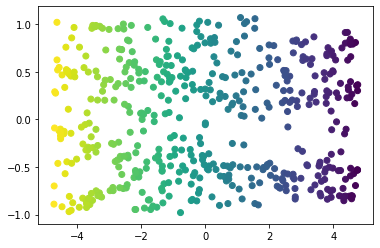

In [3]:
from sklearn.manifold import Isomap
x_iso = Isomap(n_neighbors = 15, n_components = 2).fit_transform(x)
plt.scatter(x_iso[:, 0], x_iso[:, 1], c = y)

# load digits data and visualize

(1797, 64)


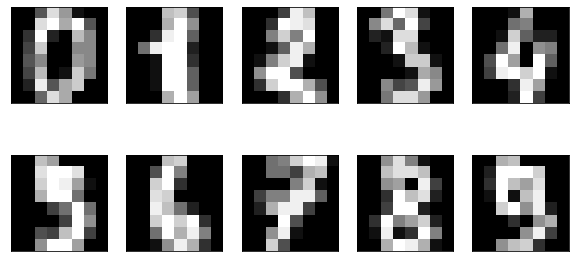

In [4]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import Normalizer
digits = load_digits()
fig, axes = plt.subplots(2, 5, figsize = (10, 5), subplot_kw = {'xticks':(), 'yticks':()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img, interpolation = 'none', cmap = 'gray')
print(digits.data.shape)

# Dimensionality reduction：
## Linear：
### PCA on digits data

[0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]


Text(0, 0.5, 'second principle component')

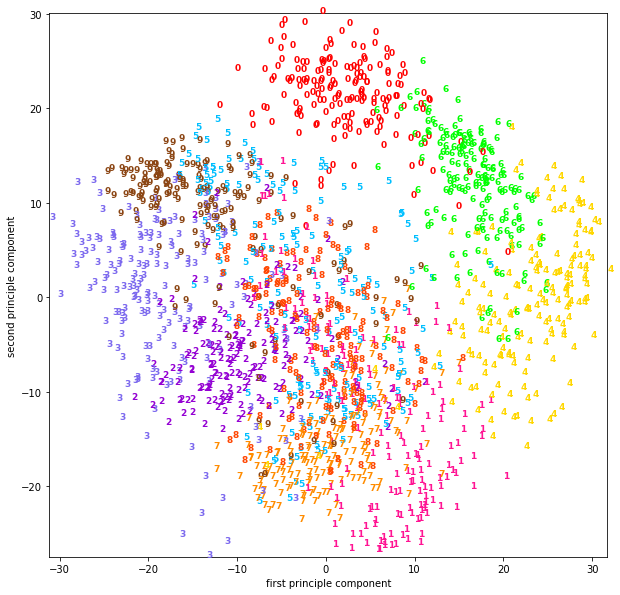

In [5]:
digits_pca = PCA(n_components = 2).fit_transform(digits.data)
colors = ['#FF0000', '#FF1493', '#9400D3', '#7B68EE', '#FFD700',
         '#00BFFF', '#00FF00', '#FF8C00', '#FF4500', '#8B4513']
print(digits.target[:20])
plt.figure(figsize = (10,10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())
for i in range(len(digits.data)):
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]), color = colors[digits.target[i]],fontdict = {'weight':'bold', 'size':9})
plt.xlabel('first principle component')
plt.ylabel('second principle component')

### Autoencoder on digits data

14.302937
9.448651
9.433045


Text(0, 0.5, 'second principle component')

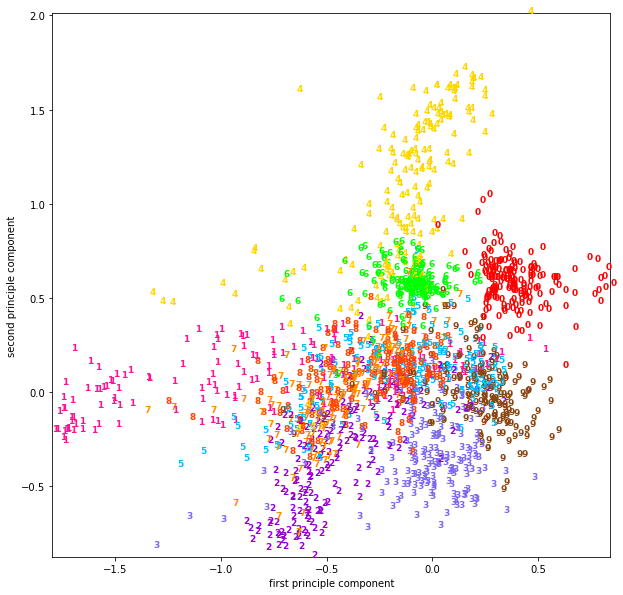

In [6]:
import torch.nn as nn
from torch.autograd import Variable as V
import torch
from torch.utils.data import DataLoader,Dataset,TensorDataset
from  sklearn.preprocessing import MinMaxScaler
import numpy
import matplotlib.pyplot as plt
# from sklearn.ensemble import IsolationForest
 
 
###### 读入数据
x=digits.data
y=digits.target
Y=y # 在画图中备用
 
###### 对输入进行归一化，因为autoencoder只用到了input
MMScaler=MinMaxScaler()
x=MMScaler.fit_transform(x)
iforestX=x
 
###### 输入数据转换成神经网络接受的dataset类型，batch设定为10
tensor_x=torch.from_numpy(x.astype(numpy.float32))
tensor_y=torch.from_numpy(y.astype(numpy.float32))
my_dataset=TensorDataset(tensor_x,tensor_y)
my_dataset_loader=DataLoader(my_dataset,batch_size=10,shuffle=False)
 
 
###### 定义一个autoencoder模型
class autoencoder(nn.Module):
    def __init__(self):
        super(autoencoder,self).__init__()
        self.encoder=nn.Sequential(
            nn.Linear(64, 8),
            nn.Tanh(),
            nn.Linear(8, 2),
        )
        self.decoder=nn.Sequential(
            nn.Linear(2, 8),
#             nn.Tanh(),
            nn.Linear(8, 64),
            nn.Sigmoid()
        )
 
    def forward(self, x):
        encoder=self.encoder(x)
        decoder=self.decoder(encoder)
        return encoder,decoder
 
model=autoencoder()
 
####### 定义损失函数
 
criterion=nn.MSELoss()
 
####### 定义优化函数
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)  # 如果采用SGD的话，收敛不下降
 
####### epoch 设定为300
 
for epoch in range(300):
    total_loss = 0
    for i ,(x,y) in enumerate(my_dataset_loader):
       _,pred=model(V(x))
       loss=criterion(pred,x)
       optimizer.zero_grad()
       loss.backward()
       optimizer.step()
       total_loss+=loss
    if epoch % 100==0:
        print(total_loss.data.numpy())
 
 
###### 基于训练好的model做降维并可视化
 
x_=[]
y_=[]
for i, (x, y) in enumerate(my_dataset):
    _, pred = model(V(x))
    #loss = criterion(pred, x)
    dimension=_.data.numpy()
    x_.append(dimension[0])
    y_.append(dimension[1])
 

plt.figure(figsize = (10,10))
plt.xlim(numpy.array(x_).min(), numpy.array(x_).max())
plt.ylim(numpy.array(y_).min(), numpy.array(y_).max())
for i in range(len(numpy.array(x_))):
    plt.text(x_[i], y_[i], str(digits.target[i]), color = colors[digits.target[i]],fontdict = {'weight':'bold', 'size':9})
plt.xlabel('first principle component')
plt.ylabel('second principle component')

## Non-linear:
### LLE on digits data

Text(0, 0.5, 'second principle component')

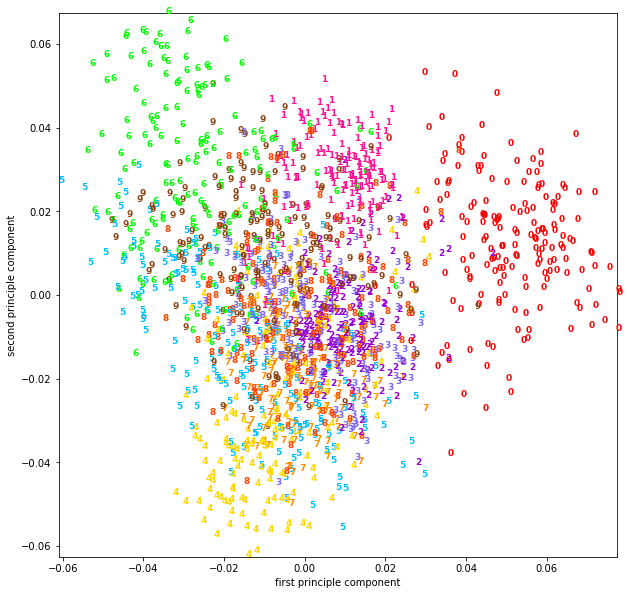

In [7]:
from sklearn.manifold import locally_linear_embedding
digits_lle, err = locally_linear_embedding(digits.data, n_neighbors = 500, n_components = 2)
plt.figure(figsize = (10,10))
plt.xlim(digits_lle[:, 0].min(), digits_lle[:, 0].max() + abs(err))
plt.ylim(digits_lle[:, 1].min(), digits_lle[:, 1].max() + abs(err))
for i in range(len(digits.data)):
    plt.text(digits_lle[i, 0], digits_lle[i, 1], str(digits.target[i]), color = colors[digits.target[i]],fontdict = {'weight':'bold', 'size':9})
plt.xlabel('first principle component')
plt.ylabel('second principle component')

### ISOMAP on digits data

Text(0, 0.5, 'second principle component')

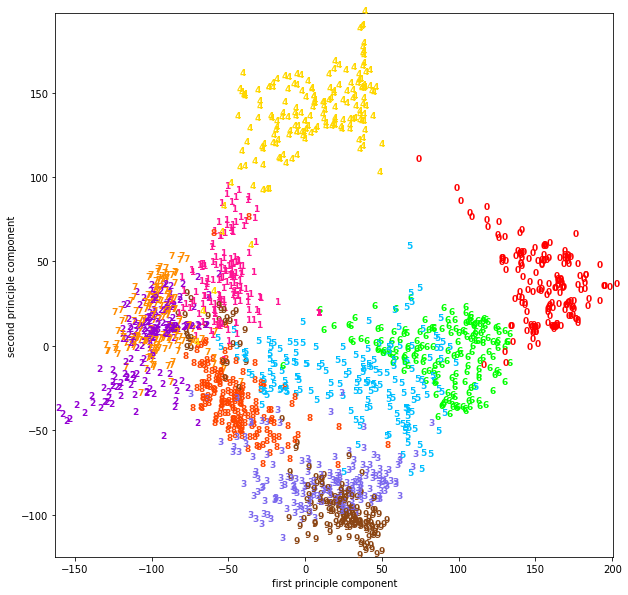

In [8]:
from sklearn.manifold import Isomap
digits_isomap = Isomap(n_components = 2).fit_transform(digits.data)
plt.figure(figsize = (10,10))
plt.xlim(digits_isomap[:, 0].min(), digits_isomap[:, 0].max())
plt.ylim(digits_isomap[:, 1].min(), digits_isomap[:, 1].max())
for i in range(len(digits.data)):
    plt.text(digits_isomap[i, 0], digits_isomap[i, 1], str(digits.target[i]), color = colors[digits.target[i]],fontdict = {'weight':'bold', 'size':9})
plt.xlabel('first principle component')
plt.ylabel('second principle component')

### UMAP on digits data

Text(0, 0.5, 'second principle component')

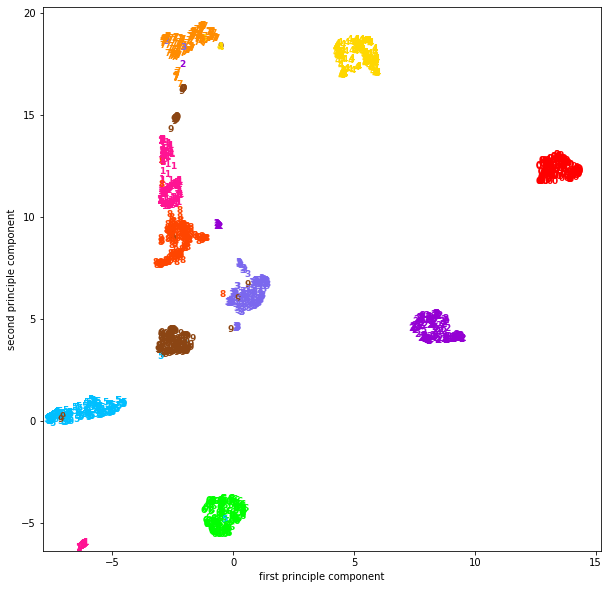

In [9]:
import umap.umap_ as umap
digits_umap = umap.UMAP(random_state=42).fit_transform(digits.data)
plt.figure(figsize = (10,10))
plt.xlim(digits_umap[:, 0].min(), digits_umap[:, 0].max()+1)
plt.ylim(digits_umap[:, 1].min(), digits_umap[:, 1].max()+1)
for i in range(len(digits.data)):
    plt.text(digits_umap[i, 0], digits_umap[i, 1], str(digits.target[i]), color = colors[digits.target[i]],fontdict = {'weight':'bold', 'size':9})
plt.xlabel('first principle component')
plt.ylabel('second principle component')

### T-SNE on digits data

[0 1 2 3 4 5 6 7 8 9]


Text(0, 0.5, 'second principle component')

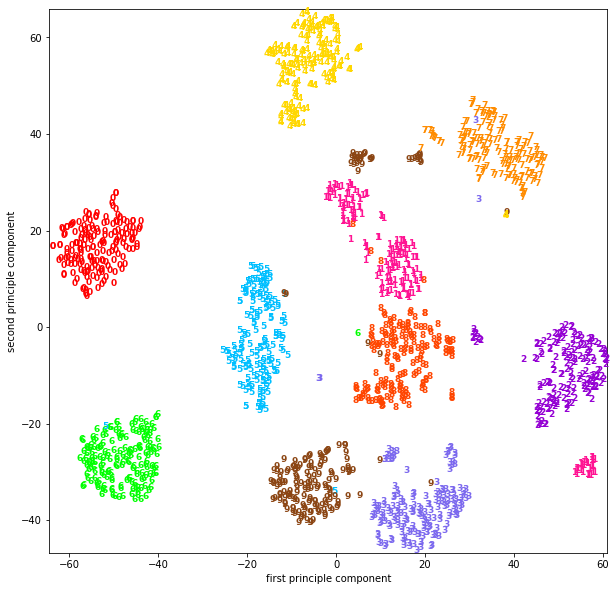

In [10]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state = 1)
digits_tsne = tsne.fit_transform(digits.data)
print(digits.target[:10])
plt.figure(figsize = (10,10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max()+1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max()+1)
for i in range(len(digits.data)):
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]), color = colors[digits.target[i]],fontdict = {'weight':'bold', 'size':9})
plt.xlabel('first principle component')
plt.ylabel('second principle component')

# Clustering：
## Partitioning-based clustering:
### K-means on digits data

adjusted_mutual_info_score: 0.9079994632579685
metrics.silhouette_score: 0.9081762252077901
v_measure_score: 0.9089114631347114
adjusted_rand_score: 0.8830341827184017


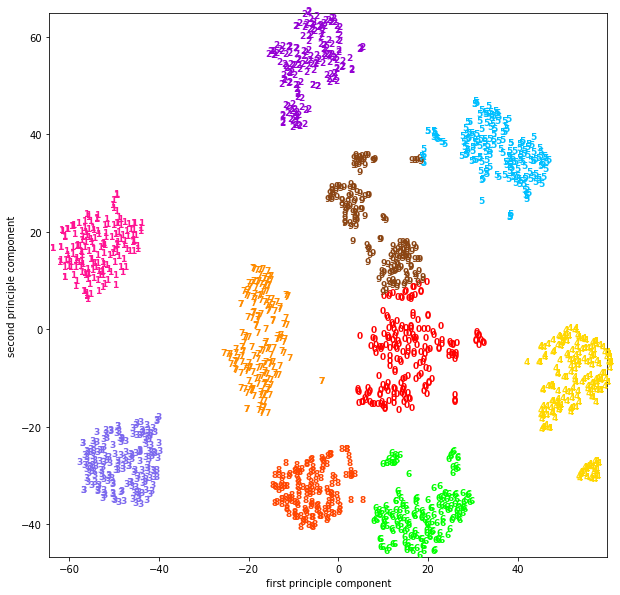

In [11]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics.cluster import adjusted_mutual_info_score
from sklearn.metrics.cluster import v_measure_score
from sklearn.metrics.cluster import adjusted_rand_score
labels = KMeans(n_clusters = 10, random_state = 0).fit_predict(digits_tsne)
# print(labels[:30])
plt.figure(figsize = (10,10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max())
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max())
for i in range(len(digits.data)):
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(labels[i]), color = colors[labels[i]],fontdict = {'weight':'bold', 'size':9})
plt.xlabel('first principle component')
plt.ylabel('second principle component')
print('adjusted_mutual_info_score:', adjusted_mutual_info_score(digits.target, labels))##调整互信息
print('metrics.silhouette_score:', metrics.homogeneity_score(digits.target, labels))##轮廓系数
print('v_measure_score:', v_measure_score(digits.target, labels))
print('adjusted_rand_score:', adjusted_rand_score(digits.target, labels))##调整兰德系数

## Hierarchical clustering:
### AGNES on digits data

adjusted_mutual_info_score: 0.9201675099394234
metrics.silhouette_score: 0.920411875569691
v_measure_score: 0.9209586975265249
adjusted_rand_score: 0.9002419390671335


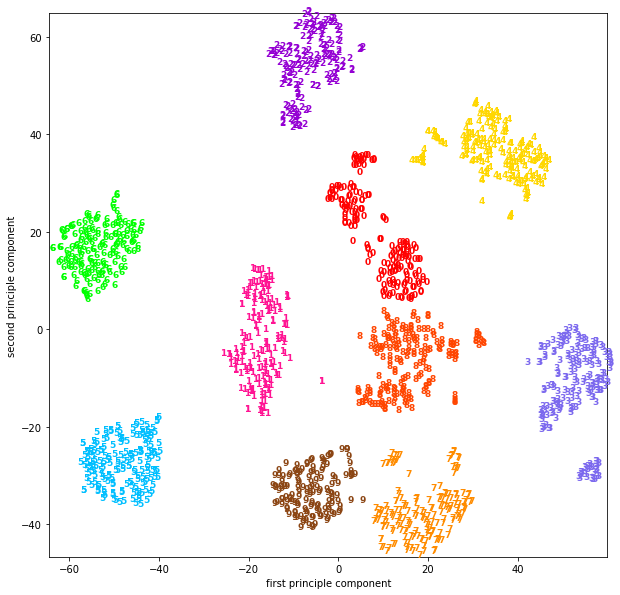

In [12]:
from sklearn.cluster import AgglomerativeClustering as AGNES
labels = AGNES(n_clusters = 10).fit_predict(digits_tsne)
# print(labels[:30])
plt.figure(figsize = (10,10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max())
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max())
for i in range(len(digits.data)):
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(labels[i]), color = colors[labels[i]],fontdict = {'weight':'bold', 'size':9})
plt.xlabel('first principle component')
plt.ylabel('second principle component')
print('adjusted_mutual_info_score:', adjusted_mutual_info_score(digits.target, labels))
print('metrics.silhouette_score:', metrics.homogeneity_score(digits.target, labels))
print('v_measure_score:', v_measure_score(digits.target, labels))
print('adjusted_rand_score:', adjusted_rand_score(digits.target, labels))

## Density-based:
### DBSCAN on digits data

adjusted_mutual_info_score: 0.9027386524243651
metrics.silhouette_score: 0.8886965656661128
v_measure_score: 0.903855957153142
adjusted_rand_score: 0.8227748698095527


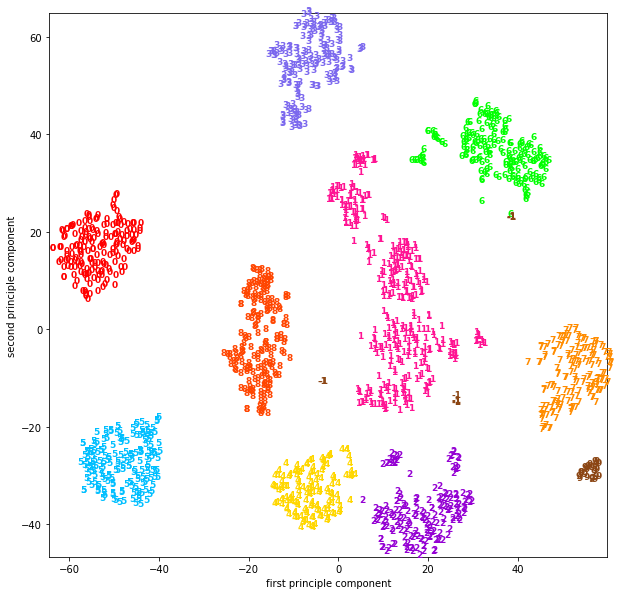

In [13]:
from sklearn.cluster import DBSCAN
labels = DBSCAN(eps = 5, min_samples = 10).fit_predict(digits_tsne)
# print(labels[:30])
plt.figure(figsize = (10,10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max())
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max())
for i in range(len(digits.data)):
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(labels[i]), color = colors[labels[i]],fontdict = {'weight':'bold', 'size':9})
plt.xlabel('first principle component')
plt.ylabel('second principle component')
print('adjusted_mutual_info_score:', adjusted_mutual_info_score(digits.target, labels))
print('metrics.silhouette_score:', metrics.homogeneity_score(digits.target, labels))
print('v_measure_score:', v_measure_score(digits.target, labels))
print('adjusted_rand_score:', adjusted_rand_score(digits.target, labels))

## Mixture model
### GMM on digits data

adjusted_mutual_info_score: 0.9182626431980705
metrics.silhouette_score: 0.9185027812214647
v_measure_score: 0.9190727339582421
adjusted_rand_score: 0.8980269054010696


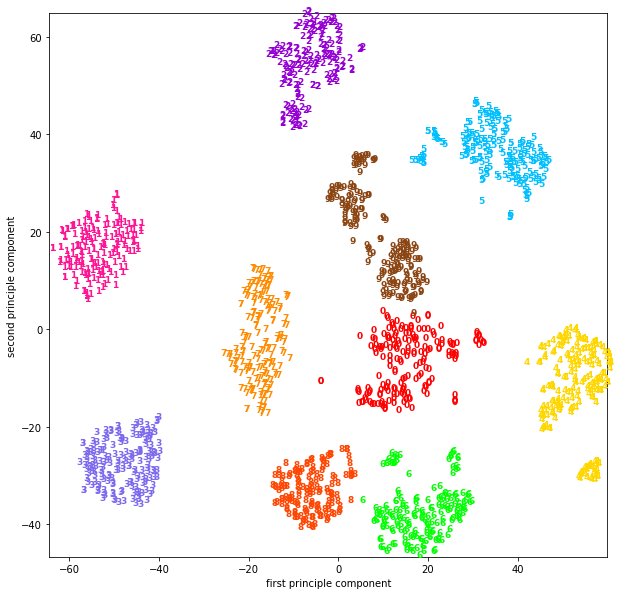

In [14]:
from sklearn.mixture import GaussianMixture as GMM
labels = GMM(n_components = 10, random_state = 0).fit_predict(digits_tsne)
plt.figure(figsize = (10,10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max())
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max())
for i in range(len(digits.data)):
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(labels[i]), color = colors[labels[i]],fontdict = {'weight':'bold', 'size':9})
plt.xlabel('first principle component')
plt.ylabel('second principle component')
print('adjusted_mutual_info_score:', adjusted_mutual_info_score(digits.target, labels))
print('metrics.silhouette_score:', metrics.homogeneity_score(digits.target, labels))
print('v_measure_score:', v_measure_score(digits.target, labels))
print('adjusted_rand_score:', adjusted_rand_score(digits.target, labels))

## Graph-based:
### Spectral clustering

adjusted_mutual_info_score: 0.4726665739122776
metrics.silhouette_score: 0.35761693865347033
v_measure_score: 0.48008592360945607
adjusted_rand_score: 0.1658688844415865


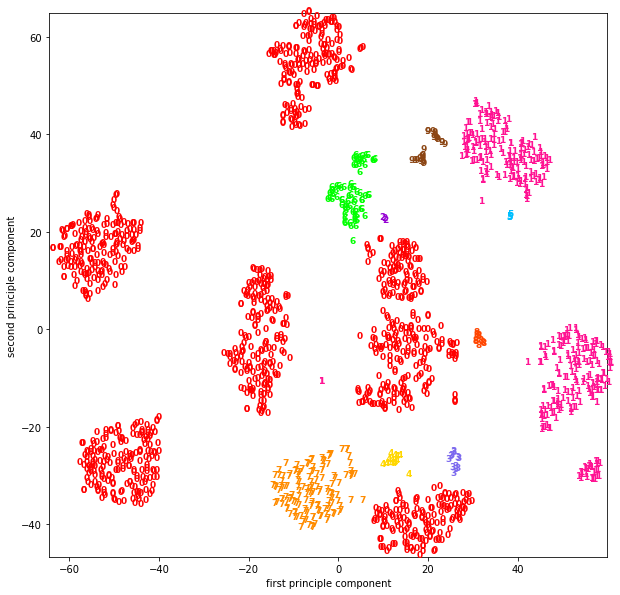

In [15]:
from sklearn.cluster import SpectralClustering as SC
labels = SC(n_clusters = 10, affinity = 'rbf').fit_predict(digits_tsne)
plt.figure(figsize = (10,10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max())
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max())
for i in range(len(digits.data)):
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(labels[i]), color = colors[labels[i]],fontdict = {'weight':'bold', 'size':9})
plt.xlabel('first principle component')
plt.ylabel('second principle component')
print('adjusted_mutual_info_score:', adjusted_mutual_info_score(digits.target, labels))
print('metrics.silhouette_score:', metrics.homogeneity_score(digits.target, labels))
print('v_measure_score:', v_measure_score(digits.target, labels))
print('adjusted_rand_score:', adjusted_rand_score(digits.target, labels))

## ISOMAP on faces

In [16]:
faces = fetch_lfw_people(min_faces_per_person = 30)
faces.data.shape

NameError: name 'fetch_lfw_people' is not defined

In [ ]:
fig, ax = plt.subplots(4, 8 , subplot_kw = dict(xticks = [], yticks = []))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap = 'gray')

In [ ]:
from sklearn.manifold import Isomap
model = Isomap(n_components = 2)
proj = model.fit_transform(faces.data)
proj.shape

In [ ]:
import numpy as np
from matplotlib import offsetbox
def plot_components(data, model, images = None, ax = None, thumb_frac = 0.05, cmap = 'gray'):
    ax = ax or plt.gca()
    proj = model.fit_transform(data)
    ax.plot(proj[:, 0], proj[:, 1], '.k')
    
    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(offsetbox.OffsetImage(images[i], cmap = cmap), proj[i])
            ax.add_artist(imagebox)
            

fig, ax = plt.subplots(figsize = (10, 10))
plot_components(faces.data, model = Isomap(n_components = 2), images = faces.images[:, ::3, ::3])